<a href="https://colab.research.google.com/github/fawazdhianabil/Orbit-Future-Academy-MSIB/blob/main/Project_Orbit3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Library**

In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords 
import string

from nltk.stem.wordnet import WordNetLemmatizer
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer()

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/fawazdhianabil/Orbit-Future-Academy-MSIB/main/sentiment_tweets3.csv')
data

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


#**Exploratory Data Analyst**

In [3]:
data.isna().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [4]:
data.shape

(10314, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [6]:
print(data[data['label (depression result)'] == 1].shape[0]/data.shape[0] *100, "% of the data is of label 1 ")
print(data[data['label (depression result)'] == 0].shape[0]/data.shape[0] *100, "% of the data is of label 0 ")

22.43552452976537 % of the data is of label 1 
77.56447547023463 % of the data is of label 0 


#**Text Preprocessing**

##**Membuat Fungsi Untuk Text Preprocessing**

In [7]:
import nltk
from nltk.corpus import stopwords 
import string 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
nlp = spacy.load('en_core_web_sm')
lmtzr = WordNetLemmatizer()
def text_preprocess(text):
    lm = []
    text = nlp(text)
    for token in text:
        lm.append(token.lemma_)
        
    text = " ".join(lm)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
   

    
    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
data['processed'] = data['message to examine'].apply(text_preprocess)

##**Mengganti White Spasi Menjadi Underscore**

In [11]:
data.columns = data.columns.str.replace(" ", "_")

##**Mengganti Symbol Menjadi White Spasi**

In [12]:
data['processed1'] = data.processed.str.replace(r"[0-9]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [13]:
data.head()

,Index,message_to_examine,label_(depression_result),processed,processed1
0,106,just had a real good moment. i missssssssss hi...,0,real good moment missssssssss much,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,read manga httpplurkcompmzp1e,read manga httpplurkcompmzpe
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen httptwitpiccom2y2lx httpwwwyoutub...,comeagainjen httptwitpiccomylx httpwwwyoutubec...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send accountant tomorrow oddly eve...,lapcat need send accountant tomorrow oddly eve...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add MYSPACE myspacecomlookthunder,add MYSPACE myspacecomlookthunder


#**Membagi Dataset**

In [14]:
#mencari vektor dari tiap kata
processed  = vectorizer.fit_transform(data['processed1'] ) 

In [15]:
X_train, X_test, y_train,y_test = train_test_split(processed, data['label_(depression_result)'], test_size=0.2)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8251, 20086), (2063, 20086), (8251,), (2063,))

#**Mencari K Optimal untuk KNN**

Minimum error:- 0.08191953465826467 at K = 22


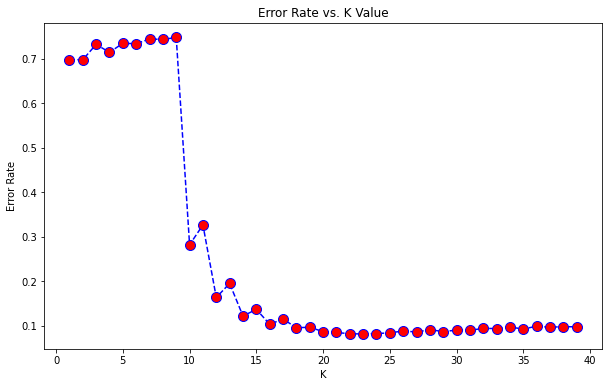

In [17]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

#**Melatih Model**

In [40]:
knn = KNeighborsClassifier(n_neighbors=22)
mnb = MultinomialNB()

In [41]:
# fitting the model
print(knn.fit(X_train, y_train))
print(mnb.fit(X_train, y_train))

KNeighborsClassifier(n_neighbors=22)
MultinomialNB()


In [42]:
y_pred_knn = knn.predict(X_test)
y_pred_mnb = mnb.predict(X_test)

#**Evaluasi Model**

##**K Nearest Neighbors**

In [43]:
confusion_matrix(y_test,y_pred_knn)

array([[1501,   62],
       [ 108,  392]])

In [44]:
print('Akurasi Model KNN adalah :', accuracy_score(y_test,y_pred_knn))

Akurasi Model KNN adalah : 0.917595734367426


In [45]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1563
           1       0.86      0.78      0.82       500

    accuracy                           0.92      2063
   macro avg       0.90      0.87      0.88      2063
weighted avg       0.92      0.92      0.92      2063



##**Naive Bayes**

In [46]:
confusion_matrix(y_test,y_pred_mnb)

array([[1561,    2],
       [ 208,  292]])

In [47]:
print('Akurasi Model KNN adalah :', accuracy_score(y_test,y_pred_mnb))

Akurasi Model KNN adalah : 0.8982064953950557


In [49]:
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1563
           1       0.99      0.58      0.74       500

    accuracy                           0.90      2063
   macro avg       0.94      0.79      0.84      2063
weighted avg       0.91      0.90      0.89      2063



#**Kesimpulan**

Berdasarkan evaluasi kedua model, didapat bahwa KNN memiliki akurasi yang lebih baik dari Naive Bayes.

In [51]:
df_skor = pd.DataFrame({'Akurasi': [accuracy_score(y_test,y_pred_knn), accuracy_score(y_test,y_pred_mnb)],
                        'Presisi': [precision_score(y_test,y_pred_knn), precision_score(y_test,y_pred_mnb)],
                        'Recall': [recall_score(y_test,y_pred_knn), recall_score(y_test,y_pred_mnb)],
                        'Metode' :['KNN', 'Naive Bayes']})
df_skor.set_index('Metode', inplace=True)
df_skor

,Akurasi,Presisi,Recall
Metode,,,
KNN,0.917596,0.863436,0.784
Naive Bayes,0.898206,0.993197,0.584
